In [188]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 12

from scipy.signal import lfilter, butter

import nibabel as nib
import os

folder = '/data/facca/'

TR = 0.72
lfreq = 0.008
hfreq = 0.09

cmap='coolwarm'

In [106]:
def bp_filter(data, lfreq=lfreq, hfreq=hfreq, TR=TR):
    b, a = butter(2, np.array([lfreq, hfreq])*2*TR, btype='band')
    return lfilter(b, a, data)

In [107]:
def load_data(subj):
    data = []

    for fname in os.listdir(folder):
        if str(subj) in fname:
            print(fname)
            tmp = nib.load(folder+fname).get_fdata().T
            data.append(tmp)
            
    return data

In [108]:
### Get subjects names
subjs = []

for fname in os.listdir(folder):
    if 'REST1' in fname:
        subjs.append(int(fname.split('.')[0]))
        
print('N subjects:', len(subjs))

N subjects: 40


In [109]:
data = load_data(subjs[1])

352132.REST1.LR.Schaefer.ptseries.nii
352132.REST1.RL.Schaefer.ptseries.nii
352132.REST2.LR.Schaefer.ptseries.nii
352132.REST2.RL.Schaefer.ptseries.nii


In [110]:
filtered = [bp_filter(tmp) for tmp in data]

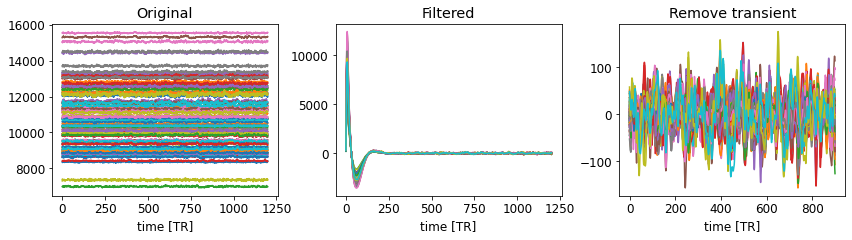

In [191]:
offset = 300

plt.figure(figsize=(12,3.5))

plt.subplot(1,3,1)
plt.plot(data[0].T)
plt.title('Original')
plt.xlabel('time [TR]')

plt.subplot(1,3,2)
plt.plot(filtered[0].T)
plt.title('Filtered')
plt.xlabel('time [TR]')

plt.subplot(1,3,3)
plt.plot(filtered[0][:,offset:].T)
plt.title('Remove transient')
plt.xlabel('time [TR]')

plt.tight_layout()
plt.show()

In [162]:
bold = filtered[0][:,offset:]
N, Tmax = bold.shape
print(N, Tmax)

fc = np.corrcoef(bold)

100 900


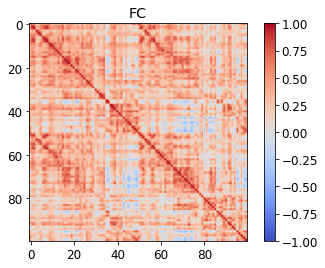

In [194]:
plt.imshow(fc, cmap=cmap, vmin=-1, vmax=1)
plt.colorbar()
plt.title('FC')
plt.show()

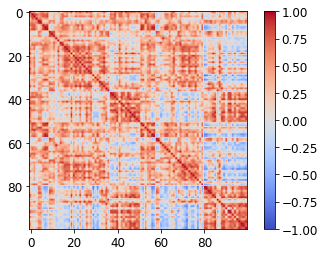

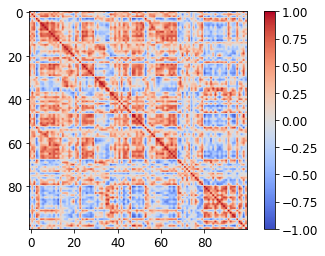

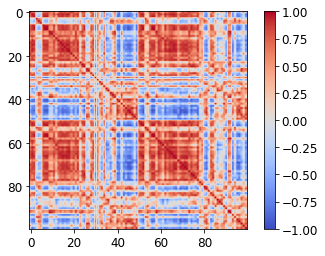

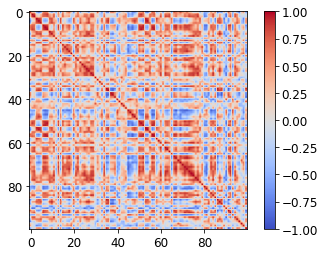

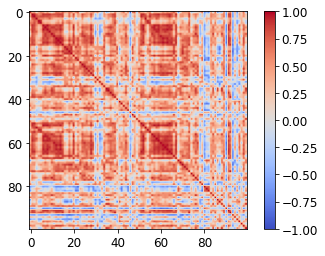

In [197]:
window = 50
shift = 50

for tt in range(5):
    tmp = bold[:,tt*shift:tt*shift+window]
    plt.imshow(np.corrcoef(tmp), cmap=cmap, vmin=-1, vmax=1)
    plt.colorbar()
    plt.show()

In [176]:
def compute_dfc(bold, window=50, shift=3, zscore=False):
    N, Tmax = bold.shape
    n_fcd = (Tmax - 2*window) // shift
    
    dfc = np.zeros((n_fcd,n_fcd))
    idx = np.triu_indices(N,1)

    for i in range(n_fcd-1):
        if i%10==0:
            print(f'{i+1}/{n_fcd-1}')
        tmp_X = bold[:,i*shift:i*shift+window]
        tmp_X = np.corrcoef(tmp_X)[idx]
    
        for j in range(i+1,n_fcd):
            tmp_Y = bold[:,j*shift:j*shift+window]
            tmp_Y = np.corrcoef(tmp_Y)[idx]
        
            dfc[i,j] = np.corrcoef(tmp_X, tmp_Y)[0,1]
        
    dfc += dfc.T + np.eye(n_fcd)
    
    return dfc

In [177]:
dfc = compute_dfc(bold)

1/265
11/265
21/265
31/265
41/265
51/265
61/265
71/265
81/265
91/265
101/265
111/265
121/265
131/265
141/265
151/265
161/265
171/265
181/265
191/265
201/265
211/265
221/265
231/265
241/265
251/265
261/265


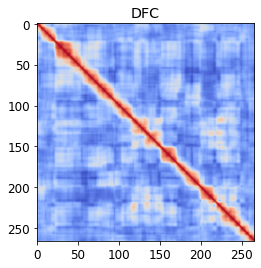

In [195]:
plt.imshow(dfc, cmap=cmap)
plt.title('DFC')
plt.show()

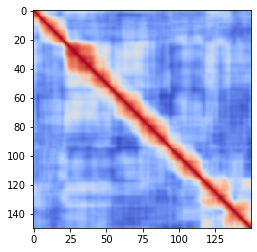

In [182]:
plt.imshow(dfc[:150,:150], cmap=cmap)
plt.show()